# 家計調査データ視覚化

<a target="_blank" href="https://colab.research.google.com/github/RyoWakabayashi/elixir-learning/blob/main/vs_python/notebooks/household_expense_statistics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 出典

総務省統計局ホームページ

家計調査（家計収支編）　時系列データ（二人以上の世帯）

https://www.stat.go.jp/data/kakei/longtime/index.html#time

- 月 全品目（2020年改定）

（2024年6月3日に利用）

## 準備

必要な Python モジュール（プログラム部品）のインストール、読込

In [1]:
# グラフで日本語を表示するためのモジュールをインストールする
!pip install japanize-matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
# 必要なモジュールを読み込む
import io

import japanize_matplotlib
import matplotlib.dates as mdates
import pandas as pd
import requests
import seaborn as sns

from matplotlib import pyplot as plt

## データダウンロード

URL を指定してダウンロードする

直接ブラウザからURLにアクセスするとCSVファイルをダウンロード・表示できる

In [3]:
DATA_URL = 'https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-2020.csv'
response = requests.get(DATA_URL)

ダウンロードしたデータはバイナリ（2進数）形式になっているため、そのまま表示しても意味が分からない

In [4]:
response.content

b'\x93\xf1\x90l\x88\xc8\x8f\xe3\x82\xcc\x90\xa2\x91\xd1_\x8ex\x8fo\x8b\xe0\x8az[\x89~],,,,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58\r\n,,,,,,,,2020\x94N,,,,,,,,,,,,2021\x94N,,,,,,,,,,,,2022\x94N,,,,,,,,,,,,2023\x94N,,,,,,,,,,,,2024\x94N,,,,,,,,,\r\n,,,,,,,,(\x97\xdf\x98a2\x94N),,,,,,,,,,,,(\x97\xdf\x98a3\x94N),,,,,,,,,,,,(\x97\xdf\x98a4\x94N),,,,,,,,,,,,(\x97\xdf\x98a5\x94N),,,,,,,,,,,,(\x97\xdf\x98a6\x94N),,,,,,,,,\r\n\x95\\\x91\xa4\x98A\x94\xd4,\x8aK\x91w,\x91\xe5\x95\xaa\x97\xde,\x92\x86\x95\xaa\x97\xde,\x8f\xac\x95\xaa\x97\xde,\x92\x86\x8a\xd4\x8cv,\x95\x84\x8d\x86,\x95i\x96\xda\x95\xaa\x97\xde,1\x8c\x8e, 2\x8c\x8e, 3\x8c\x8e, 4\x8c\x8e, 5\x8c\x8e, 6\x8c\x8e, 7\x8c\x8e, 8\x8c\x8e, 9\x8c\x8e, 10\x8c\x8e, 11\x8c\x8e, 12\x8c\x8e, 1\x8c\x8e, 2\x8c\x8e, 3\x8c\x8e, 4\x8c\x8e, 5\x8c\x8e, 6\x8c\x8e, 7\x8c\x8e, 8\x8c\x8e, 9\x8c\x8e, 10\x8c\x8e, 11\x8c\x8e, 12\x8c\x8

「ShiftJIS」の文字コードで変換すると、文字として読むことができるようになる

In [5]:
raw_data = response.content.decode('sjis')
raw_data

'二人以上の世帯_支出金額[円],,,,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58\r\n,,,,,,,,2020年,,,,,,,,,,,,2021年,,,,,,,,,,,,2022年,,,,,,,,,,,,2023年,,,,,,,,,,,,2024年,,,,,,,,,\r\n,,,,,,,,(令和2年),,,,,,,,,,,,(令和3年),,,,,,,,,,,,(令和4年),,,,,,,,,,,,(令和5年),,,,,,,,,,,,(令和6年),,,,,,,,,\r\n表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月\r\n1,-,-,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,100

`pd.read_csv` でデータを構造化して読み込むことができる

ただし、そのままだと先頭の3行が邪魔で、正しく構造化されません

In [6]:
# データフレームという形式で読み込む
df = pd.read_csv(io.StringIO(raw_data))
df

,二人以上の世帯_支出金額[円],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,1,2,...,49,50,51,52,53,54,55,56,57,58
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020年,NaN,...,2024年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(令和2年),NaN,...,(令和6年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,1月,2月,...,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月
3,1,-,-,-,-,-,-,世帯数分布(抽出率調整),10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,2,-,-,-,-,-,-,集計世帯数,7443,7475,...,7258,7294,7243,7199,7223,7212,7213,7236,7238,7202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,686,-,-,-,-,-,-,会費・つきあい費,770,705,...,540,522,612,669,570,618,564,534,583,537
689,687,-,-,-,-,-,-,その他の教養娯楽,8239,7674,...,9010,8942,10402,10793,11121,9727,9704,10865,9906,9915
690,688,-,-,-,-,-,-,消費支出(再掲),287173,271735,...,289467,279868,318713,313300,290328,280888,290931,297487,287963,305819
691,689,-,-,-,-,-,-,基礎的支出,167873,157888,...,172502,164476,178592,171436,169103,166179,172176,184382,166292,175214


## データ加工

先頭3行を消します

In [7]:
# '\r\n' は改行を意味するコード
# 改行で区切る（split）ことで、文字列を行毎に分割する
rows = raw_data.split('\r\n')
rows

['二人以上の世帯_支出金額[円],,,,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58',
 ',,,,,,,,2020年,,,,,,,,,,,,2021年,,,,,,,,,,,,2022年,,,,,,,,,,,,2023年,,,,,,,,,,,,2024年,,,,,,,,,',
 ',,,,,,,,(令和2年),,,,,,,,,,,,(令和3年),,,,,,,,,,,,(令和4年),,,,,,,,,,,,(令和5年),,,,,,,,,,,,(令和6年),,,,,,,,,',
 '表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月',
 '1,-,-,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,1000

In [8]:
# [3:]で範囲を指定している
# Python では 0, 1, 2, 3 ... と順序を指定するため、 [3:] は4行目以降という意味になる
essential_rows = rows[3:]
essential_rows

['表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月',
 '1,-,-,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000',
 '2,-,-,-,-,-,-,集計世帯数,7443,7475,7489,7534,7430,7489,7521,7557,7535,7532,7506,7540,7485,7485,7425,7459,7459,7401,7370,7397,7378,7407,7411,7416,7353,7315,7369,7357,7391,7348,7307,7339,7369,7324,7308,7315,7207,7185,7240,7228,7284,7256,7231,7254,7267,7309,7300,7348,7258,7294,7243,7199,7223,7212,7213,7236,7238,7202',
 '3,-,-,-,-,-,-,世帯人員(人),2.9

先頭行が「列名」として使えるものになりました
ただし、「1月」「2月」「3月」などの列名に年が含まれていないため、加工します

In [9]:
# [0]で先頭行だけを取得する
header = essential_rows[0]
header

'表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月, 11月, 12月, 1月, 2月, 3月, 4月, 5月, 6月, 7月, 8月, 9月, 10月'

In [10]:
# 先頭行を`,`(カンマ)で区切り、各列名を処理する
new_cols = []
key_cols = []
month_cols = []
for (index, col) in enumerate(header.split(',')):
  if index <= 7:
    new_cols.append(col)
    key_cols.append(col)
  else:
    month = (index - 8) % 12 + 1
    year = (index - 8) // 12 + 2020
    col = f"month{year}{('0' + str(month))[-2:]}01"
    new_cols.append(col)
    month_cols.append(col)

new_header = ','.join(new_cols)
new_header

'表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,month20200101,month20200201,month20200301,month20200401,month20200501,month20200601,month20200701,month20200801,month20200901,month20201001,month20201101,month20201201,month20210101,month20210201,month20210301,month20210401,month20210501,month20210601,month20210701,month20210801,month20210901,month20211001,month20211101,month20211201,month20220101,month20220201,month20220301,month20220401,month20220501,month20220601,month20220701,month20220801,month20220901,month20221001,month20221101,month20221201,month20230101,month20230201,month20230301,month20230401,month20230501,month20230601,month20230701,month20230801,month20230901,month20231001,month20231101,month20231201,month20240101,month20240201,month20240301,month20240401,month20240501,month20240601,month20240701,month20240801,month20240901,month20241001'

In [11]:
# 先頭行を変換後の文字列に入れ替える
essential_rows[0] = new_header
essential_rows

['表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,month20200101,month20200201,month20200301,month20200401,month20200501,month20200601,month20200701,month20200801,month20200901,month20201001,month20201101,month20201201,month20210101,month20210201,month20210301,month20210401,month20210501,month20210601,month20210701,month20210801,month20210901,month20211001,month20211101,month20211201,month20220101,month20220201,month20220301,month20220401,month20220501,month20220601,month20220701,month20220801,month20220901,month20221001,month20221101,month20221201,month20230101,month20230201,month20230301,month20230401,month20230501,month20230601,month20230701,month20230801,month20230901,month20231001,month20231101,month20231201,month20240101,month20240201,month20240301,month20240401,month20240501,month20240601,month20240701,month20240801,month20240901,month20241001',
 '1,-,-,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,100

加工したデータを構造化することで、表として見ることができるようになりました

例えば2020年1月、1世帯当たり784円食パンに消費していることが分かります

In [12]:
# 全ての行を改めて結合し、データフレームに読み込む
df = pd.read_csv(io.StringIO('\r\n'.join(essential_rows)))
df

,表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,month20200101,month20200201,...,month20240101,month20240201,month20240301,month20240401,month20240501,month20240601,month20240701,month20240801,month20240901,month20241001
0,1,-,-,-,-,-,-,世帯数分布(抽出率調整),10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
1,2,-,-,-,-,-,-,集計世帯数,7443.00,7475.00,...,7258.00,7294.00,7243.00,7199.00,7223.00,7212.00,7213.00,7236.00,7238.00,7202.00
2,3,-,-,-,-,-,-,世帯人員(人),2.96,2.96,...,2.89,2.89,2.89,2.88,2.88,2.88,2.88,2.88,2.88,2.88
3,4,-,-,-,-,-,-,18歳未満人員(人),0.58,0.58,...,0.54,0.55,0.55,0.54,0.54,0.55,0.54,0.52,0.53,0.52
4,5,-,-,-,-,-,-,65歳以上人員(人),0.82,0.83,...,0.86,0.85,0.85,0.85,0.85,0.85,0.87,0.86,0.85,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,686,-,-,-,-,-,-,会費・つきあい費,770.00,705.00,...,540.00,522.00,612.00,669.00,570.00,618.00,564.00,534.00,583.00,537.00
686,687,-,-,-,-,-,-,その他の教養娯楽,8239.00,7674.00,...,9010.00,8942.00,10402.00,10793.00,11121.00,9727.00,9704.00,10865.00,9906.00,9915.00
687,688,-,-,-,-,-,-,消費支出(再掲),287173.00,271735.00,...,289467.00,279868.00,318713.00,313300.00,290328.00,280888.00,290931.00,297487.00,287963.00,305819.00
688,689,-,-,-,-,-,-,基礎的支出,167873.00,157888.00,...,172502.00,164476.00,178592.00,171436.00,169103.00,166179.00,172176.00,184382.00,166292.00,175214.00


時間による推移を見たいため、年月を「列」ではなく「行」にします

このように「列」と「行」を入れ替える = 軸を回転することをピボットといいます

ピボットにより、品目分類と年月を指定して検索するようなことがしやすくなりました

In [13]:
# `wide_to_long` で横長（wide）になっているデータを縦長(long)にする
pivot_df = pd.wide_to_long(df,stubnames=['month'],i='品目分類',j='yyyymmdd').reset_index()
pivot_df['yyyymmdd'] = pd.to_datetime(pivot_df['yyyymmdd'].astype('str'))
pivot_df = pivot_df[key_cols + ['yyyymmdd', 'month']].rename(columns={'yyyymmdd': '年月', 'month': '支出額'})
pivot_df

,表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,年月,支出額
0,1,-,-,-,-,-,-,世帯数分布(抽出率調整),2020-01-01,10000.00
1,2,-,-,-,-,-,-,集計世帯数,2020-01-01,7443.00
2,3,-,-,-,-,-,-,世帯人員(人),2020-01-01,2.96
3,4,-,-,-,-,-,-,18歳未満人員(人),2020-01-01,0.58
4,5,-,-,-,-,-,-,65歳以上人員(人),2020-01-01,0.82
...,...,...,...,...,...,...,...,...,...,...
40015,686,-,-,-,-,-,-,会費・つきあい費,2024-10-01,537.00
40016,687,-,-,-,-,-,-,その他の教養娯楽,2024-10-01,9915.00
40017,688,-,-,-,-,-,-,消費支出(再掲),2024-10-01,305819.00
40018,689,-,-,-,-,-,-,基礎的支出,2024-10-01,175214.00


## データ抽出

以下のように指定することで、ケーキの支出額推移を見ることができます

In [14]:
pivot_df[pivot_df['品目分類'] == 'ケーキ']

,表側連番,階層,大分類,中分類,小分類,中間計,符号,品目分類,年月,支出額
190,191,4,1,8,-,-,344,ケーキ,2020-01-01,509.0
880,191,4,1,8,-,-,344,ケーキ,2020-02-01,505.0
1570,191,4,1,8,-,-,344,ケーキ,2020-03-01,621.0
2260,191,4,1,8,-,-,344,ケーキ,2020-04-01,482.0
2950,191,4,1,8,-,-,344,ケーキ,2020-05-01,564.0
3640,191,4,1,8,-,-,344,ケーキ,2020-06-01,490.0
4330,191,4,1,8,-,-,344,ケーキ,2020-07-01,452.0
5020,191,4,1,8,-,-,344,ケーキ,2020-08-01,458.0
5710,191,4,1,8,-,-,344,ケーキ,2020-09-01,507.0
6400,191,4,1,8,-,-,344,ケーキ,2020-10-01,562.0


## データ集計

以下のようにすることでケーキの支出額について、基本統計量を確認することができます

各行の意味は以下の通りです

- mean: 平均
- min: 最小値
- 25%: 第１四分位数
- 50%: 中央値
- 75%: 第3四分位数
- max: 最大値
- std: 標準偏差

各列について見てみましょう

- 「表側連番」は名義尺度なので基本統計量に意味がありません
- 「年月」は間隔尺度です。このデータの時間的な範囲を確認できます。
- 「支出額」は比例尺度です。おおよそどのように分布しているのか見ることができます。

In [15]:
pivot_df[pivot_df['品目分類'] == 'ケーキ'].describe()

,表側連番,年月,支出額
count,58.0,58,58.000000
mean,191.0,2022-05-17 04:08:16.551724032,614.775862
min,191.0,2020-01-01 00:00:00,452.000000
25%,191.0,2021-03-08 18:00:00,507.250000
50%,191.0,2022-05-16 12:00:00,555.000000
75%,191.0,2023-07-24 06:00:00,613.000000
max,191.0,2024-10-01 00:00:00,1431.000000
std,0.0,NaN,225.076988


## データの視覚化

以下のようにして支出額の箱ひげ図が作成できます

中央値「564円」の近辺に箱、ひげが描画され、1400近辺に外れ値があることが分かります

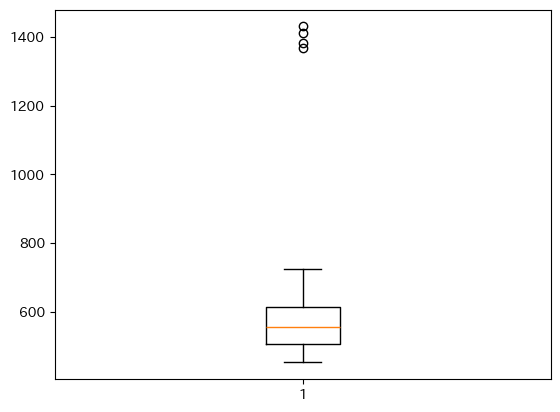

In [16]:
fig, ax = plt.subplots()
ax.boxplot(pivot_df[pivot_df['品目分類'] == 'ケーキ']['支出額'])
plt.show()

以下のようにして時系列のグラフを作成できます

ケーキの支出額が毎年12月に突出していることが分かります

ここから、クリスマスに圧倒的にケーキが多く買われていることが推測できます

In [17]:
# 時系列グラフを出力するための関数（処理のかたまり）
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['年月']
  ys = series['支出額']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

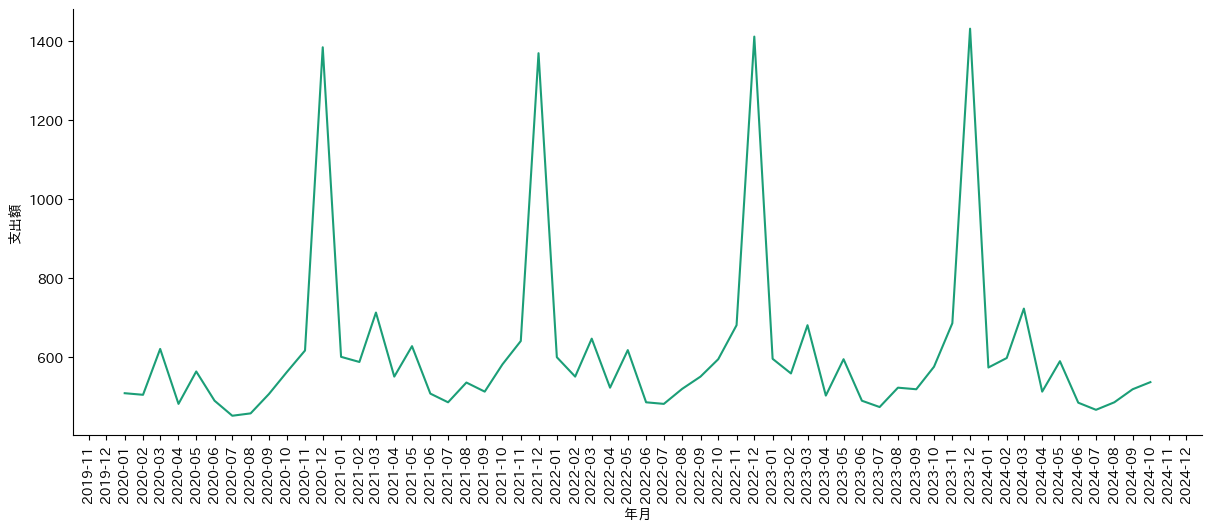

In [18]:
fig, ax = plt.subplots(figsize=(12, 5.2), layout='constrained')

# 毎月ラベルを表示する
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator())

# 年月で並び替えて時系列にする
df_sorted = pivot_df[pivot_df['品目分類'] == 'ケーキ'].sort_values('年月', ascending=True)

# 時系列グラフを出力する
_plot_series(df_sorted, '')

sns.despine(fig=fig, ax=ax)
plt.xlabel('年月')
_ = plt.ylabel('支出額')

# ラベルを垂直にする
fig.autofmt_xdate(rotation=90, ha="center")